<a href="https://colab.research.google.com/github/dewikinasih/Customer-Churn-Prediction/blob/main/Customers_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Input Data dan Data Cleaning

In [1]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df.shape

(100000, 8)

In [2]:
# melihat 5 data teratas
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [4]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,1466304274396,1538718482608,1467681,22
1,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,141526,Tas,1493349147000,1548322802000,310915,30
3,141526,Jaket,1493362372547,1547643603911,722632,27
4,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [5]:
# Periksa Missing Data
df.isna().sum()

Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64

In [6]:
# Mengganti tipe data menjadi datetime
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [7]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


In [8]:
# Klasifikasi
df.loc[df['Last_Transaction'] <= '2018-08-01','is_churn'] = True
df.loc[df['Last_Transaction'] >= '2018-08-01','is_churn'] = False
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


## Visualisasi

In [9]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018


In [10]:
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()

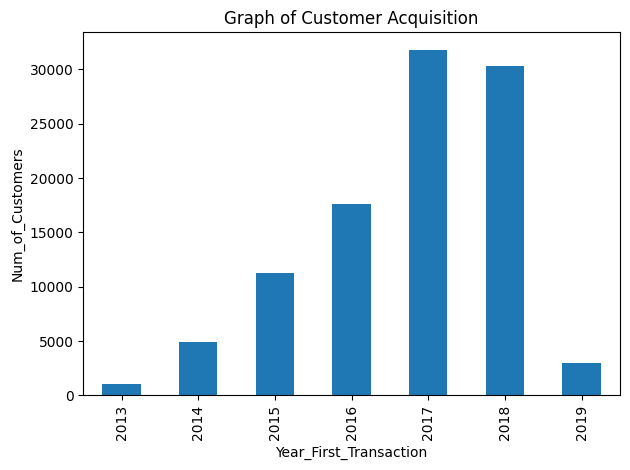

In [11]:
import matplotlib.pyplot as plt
df_year.plot(x='Year_First_Transaction', y='Num_of_Customers', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customers')
plt.tight_layout()
plt.show()

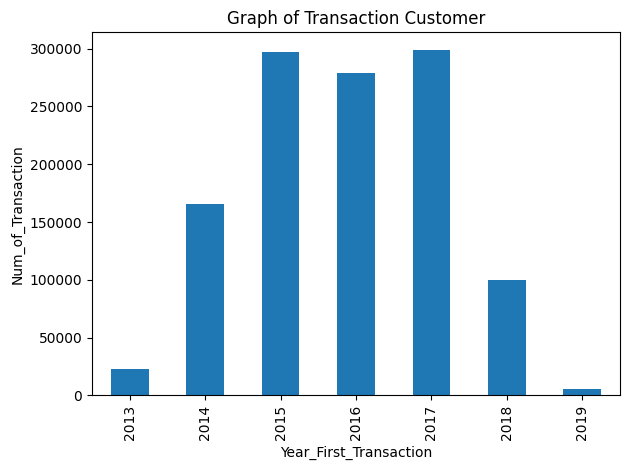

In [12]:
df_count = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_count.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

<ipython-input-13-151d81295572>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(),


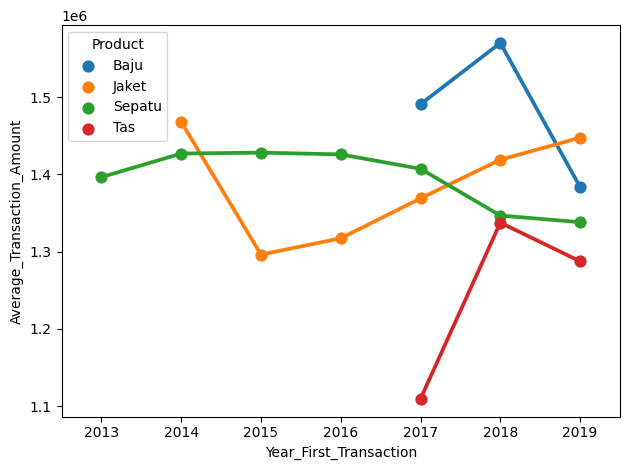

In [13]:
import seaborn as sns
sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

In [15]:
# Pivot
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
df_piv

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


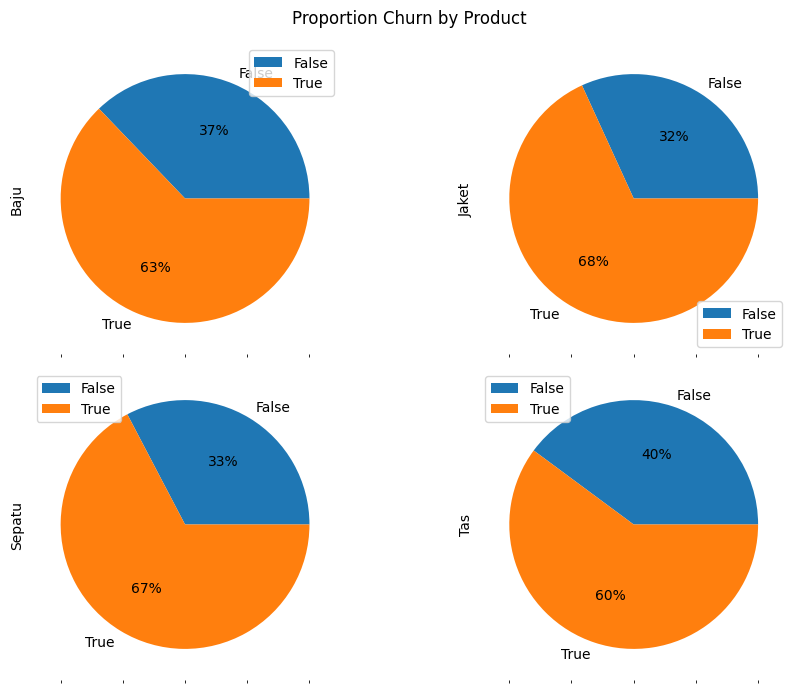

In [16]:
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

## Logistic Regression

In [17]:
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn']

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [23]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

## Model Evaluation

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    1,  8364],
       [    3, 16632]])

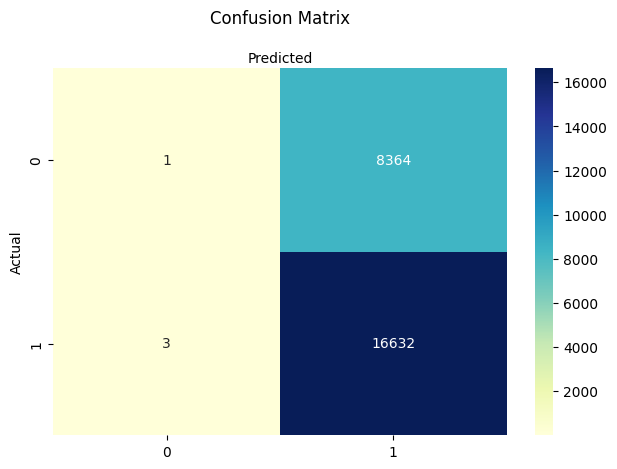

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66532
Precision: 0.66532
Recall   : 0.66532
